# Modèle d'aide à la detection de décrochage scolaire

In [1]:
# importation de librairie

import pandas as pd
import matplotlib.pyplot as pl

## EDA (Exploration Data Analysis)

Dans le cadre de ce projet, il a été mise à la disposition 06 fichiers de process verbal d'une institution de la place à Yaoundé.

Nous allons dans la suite essayer de comprehendre et d'extraire des insights dans les données.

In [2]:
pv_2c = pd.read_excel("proces_verbal_2ndeA4_2019-2020.xlsx")

In [3]:
pv_2a = pd.read_excel("proces_verbal_2ndeC_2020-2021.xlsx")

In [4]:
pv_3 = pd.read_excel("proces_verbal_3eme_2018-2019.xlsx")

In [5]:
pv_4 = pd.read_excel("proces_verbal_3eme_2018-2019.xlsx")

In [6]:
pv_5 = pd.read_excel("proces_verbal_5eme_2016-2017.xlsx")

In [7]:
pv_6 = pd.read_excel("proces_verbal_6eme_2015-2016.xlsx")

In [8]:
# strip columns name
def stripColName(dataframe):
    # remove space in columns' name
    new_columns = {col:col.strip() for col in dataframe.columns.to_list()}
    dataframe.rename(columns=new_columns, inplace=True)

In [9]:
stripColName(pv_2c)
stripColName(pv_2a)
stripColName(pv_3)
stripColName(pv_4)
stripColName(pv_5)
stripColName(pv_6)

### EDA du PV de la classe de 3ème

In [10]:
# show the first 5 rows of the dataset
pv_3.head()

,Nro,Matricule,Nom et Prenom,Sexe,Date Naissance,Lieu Naissance,ANG(3),ET(1),EE(2),EO(1),...,Trm_2,Trm_3,Apre.,Ab.,Cs.,Exc.,Av.,Bl.,CD,Age.
0,1,16HV0033,NaN,M,2005-09-22,YAOUNDE,48.75,14.92,25.66,15.0,...,15.13,15.14,NaN,1,0,0,NON,NON,0,16
1,7,16HV0124,NaN,F,2005-03-25,Yaoundé 5e,50.13,12.92,25.00,15.8,...,14.34,12.57,NaN,3,0,0,NON,NON,0,16
2,7,16HV0130,NaN,F,2005-08-11,YOKADOUMA,30.24,10.08,19.84,15.4,...,10.53,9.57,NaN,12,0,0,NON,NON,0,16
3,7,16HV0148,NaN,M,2007-12-05,FIGUIL,26.37,10.92,19.34,13.8,...,10.92,11.38,NaN,2,0,0,NON,NON,0,14
4,7,16HV0053,NaN,M,2003-08-15,YAOUNDE,26.25,9.17,17.84,12.4,...,10.88,9.11,NaN,13,0,0,NON,NON,0,18


In [11]:
# show the distribution of the class based on their a specifique nominal attribut
def showDistro(column, name):
    age_dist = column.hist()
    pl.xlabel(name)
    pl.ylabel("Occurences")
    for i, bar in enumerate(age_dist.containers[0]):
        height = bar.get_height()
        if height != 0.0:
            pl.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height + .5), xytext=(3, 0), textcoords='offset points', ha='center', va='center',fontsize=8)
    pl.show()
    pl.close


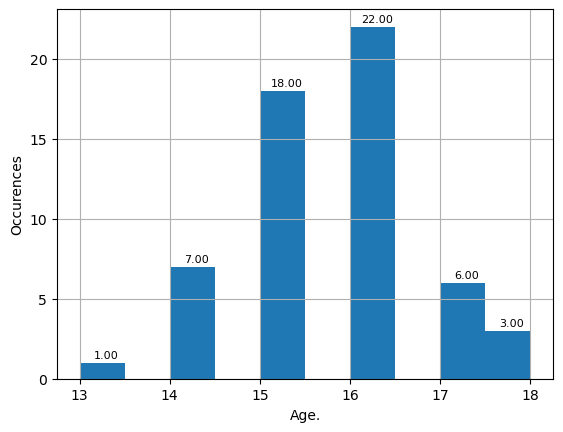

In [12]:
# age distro
showDistro(pv_3["Age."], "Age.")

we notice that __80%__ of students have at least 18 years old

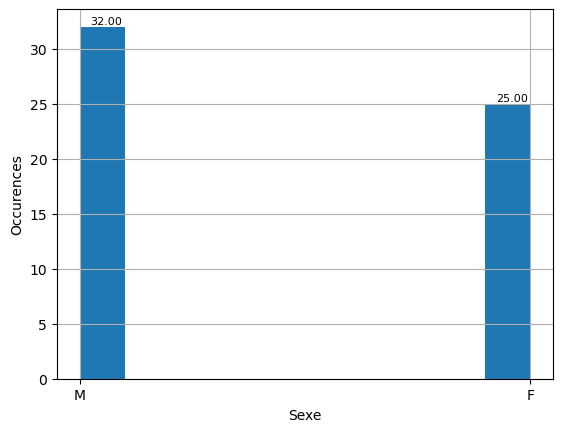

In [13]:
# age distro
showDistro(pv_3["Sexe"], "Sexe")

we notice that __56%__ of students are mens

In [14]:
# check stadents who abandon in this class from 4ème
student_3 = list(pv_3["Matricule"].values)
student_4= list(pv_4["Matricule"].values)
student_from_4_to_3 = set(student_4) & set(student_3)
student_abandon = set(student_4) - student_from_4_to_3
print(f"""
abandon : {student_abandon}

other: {student_from_4_to_3}
""")



abandon : set()

other: {'18HV0133', '16HV0152', '16HV0012', '16HV0001', '16HV0112', '16HV0193', '16HV0214', '16HV0002', '19HV0188', '16HV0010', '16HV0148', '19HV0181', '19HV0195', '16HV0033', '16HV0124', '16HV0109', '16HV0059', '16HV0026', '16HV0042', '16HV0071', '19HV0186', '16HV0191', '16HV0005', '16HV0167', '17HV0046', '19HV0194', '18HV0136', '19HV0190', '16HV0013', '19HV0191', '19HV0193', '16HV0029', '16HV0053', '16HV0034', '16HV0201', '16HV0123', '16HV0015', '16HV0160', '18HV0132', '21HV0201', '16HV0040', '16HV0149', '16HV0128', '16HV0085', '19HV0189', '18HV0131', '16HV0130', '16HV0008', '16HV0168', '16HV0045', '19HV0180', '16HV0051', '16HV0020', '16HV0146', '16HV0093', '16HV0003', '16HV0145'}



In [15]:
# check stadents who abandon in this class from 4ème
student_5= list(pv_5["Matricule"].values)
student_from_5_to_4 = set(student_5) & set(student_4)
student_abandon = set(student_5) - student_from_5_to_4
print(f"""
abandon : {student_abandon}
other: {student_from_5_to_4}
""")


abandon : {'16HV0135', '16HV0176', '17HV0017', '16HV0099', '16HV0133', '16HV0079', '16HV0094', '16HV0087', '16HV0009', '16HV0054', '16HV0115', '16HV0144', '16HV0089', '16HV0090', '16HV0122', '16HV0119', '16HV0200', '16HV0092', '16HV0021', '16HV0161', '16HV0017', '16HV0007', '16HV0022', '16HV0028', '16HV0182', '16HV0074', '16HV0011'}
other: {'16HV0012', '16HV0112', '16HV0001', '16HV0193', '16HV0214', '16HV0002', '16HV0010', '16HV0148', '16HV0033', '16HV0124', '16HV0034', '16HV0123', '16HV0015', '16HV0160', '16HV0040', '16HV0128', '16HV0045', '16HV0051', '16HV0146', '16HV0003', '16HV0145'}



In [16]:
# check stadents who abandon in this class from 4ème
student_6= list(pv_6["Matricule"].values)
student_from_6_to_5 = set(student_6) & set(student_5)
student_abandon = set(student_6) - student_from_6_to_5
print(f"""
abandon : {student_abandon}
other: {student_from_6_to_5}
""")


abandon : {'16HV0192', '16HV0179', '16HV0041', '16HV0157', '16HV0116', '16HV0100', '16HV0095', '16HV0088', '16HV0016', '16HV0042', '16HV0026', '16HV0191', '16HV0091', '16HV0070', '16HV0058', '16HV0029', '16HV0170', '16HV0081', '16HV0080', '16HV0166', '16HV0046', '16HV0004', '16HV0049', '16HV0153', '16HV0050', '16HV0096', '16HV0102', '16HV0073', '16HV0168', '16HV0014', '16HV0048', '16HV0044', '16HV0062'}
other: {'16HV0135', '16HV0176', '16HV0133', '16HV0079', '16HV0012', '16HV0112', '16HV0001', '16HV0094', '16HV0193', '16HV0002', '16HV0010', '16HV0033', '16HV0124', '16HV0054', '16HV0122', '16HV0034', '16HV0160', '16HV0128', '16HV0017', '16HV0051', '16HV0007', '16HV0146', '16HV0028', '16HV0003', '16HV0145', '16HV0011'}



In [18]:
pd.read_csv("Secondary_school_dropout_dataset.csv")

,location_name,home_language,hh_occupation,hh_edu,hh_size,school_distanceKm,age,gender,mothers_edu,grade,meansToSchool,hh_children,dropout
0,Rural,English,Unemployed,Secondary,More than five,1-2 km,11,Male,Primary,Form Two,Walk,More than five,No
1,Urban,English,Unemployed,Primary,More than five,2-3 km,11,Male,Primary,Form One,Walk,More than five,Yes
2,Urban,Kiswahili,Self-employed,Secondary,More than five,4-5 km,11,Female,Secondary,Form Two,Public transport,More than five,No
3,Urban,Kiswahili,Unemployed,Secondary,More than five,More than 11 km,11,Male,Primary,Form One,Walk,Five Children,No
4,Urban,Kiswahili,Self-employed,Secondary,More than five,4-5 km,11,Female,Secondary,Form One,Public transport,More than five,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62734,Rural,English,Unemployed,None,Four Children,2-3 km,16,Female,None,Form One,Bicycle/motorbike,Two Children,No
62735,Rural,English,Unemployed,None,Five Children,2-3 km,16,Male,None,Form Two,Walk,Two Children,No
62736,Rural,English,Unemployed,None,More than five,2-3 km,16,Female,Primary,Form Three,Walk,Three Children,No
62737,Rural,English,Unemployed,None,Three Children,2-3 km,16,Female,Primary,Form One,Walk,Two Children,No
